In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model# import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split

##This is code was used to find the missing values.  It is not part of the main program

In [319]:
regr2 = linear_model.LinearRegression()
fit = regr2.fit(input_data, carbo)
print(regr2.score(input_data_test, carbo_test))
regr2.predict([100, 3, 0, 80, 1, 21, 0 , 0, 2 ,1, 1.00 ])

0.885924222305


array([[ 65.44770277]])

In [305]:
cerealmis = cereal[cereal.potass == -1]
cereal = cereal[cereal >= 0]
cerealmiscol = cerealmis[['calories', 'protein', 'fat', 'sodium', 'fiber', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
cereal = cereal.dropna()
#celist = list(cerealmiscol.iloc[0,:])
print(cerealmis)

                      name mfr type  calories  protein  fat  sodium  fiber  \
4           Almond_Delight   R    C       110        2    2     200      1   
20  Cream_of_Wheat_(Quick)   N    H       100        3    0      80      1   

    carbo  sugars  potass  vitamins  shelf  weight  cups  
4      14       8      -1        25      3       1  0.75  
20     21       0      -1         0      2       1  1.00  


In [315]:
#print(cereal.describe())
print("carbo", "sugars", "potass")
cereal_train, cereal_test = train_test_split(cereal)
#print(cereal_train.columns)
input_data = cereal_train[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'vitamins', 'shelf', 'weight', 'cups']]
input_data_test = cereal_test[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'vitamins', 'shelf', 'weight', 'cups']]
carbo = cereal_train[['potass']]
carbo_test = cereal_test[["potass"]]
input_data.head()

carbo sugars potass


,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,shelf,weight,cups
49,140,3,2,220,3,21,7,25,3,1.33,0.67
53,100,3,0,320,1,20,3,100,3,1.00,1.00
65,90,3,0,0,3,20,0,0,1,1.00,0.67
63,80,2,0,0,3,16,0,0,1,0.83,1.00
48,120,2,1,190,0,15,9,25,2,1.00,0.67


##Main Program Starts

In [400]:
%matplotlib inline

In [401]:
cereal = pd.read_csv("cereals.csv")
cereal.loc[57, 'carbo'] = 12.04
cereal.loc[57, 'sugars'] = 15.94
cereal.loc[4, 'potass'] = 76.36
cereal.loc[20, 'potass'] = 65.44
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280.00,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135.00,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320.00,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330.00,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,76.36,25,3,1,0.75


In [402]:
names = cereal.pop('name')
mfr = cereal.pop('mfr')
protein = cereal.pop('type')

In [403]:
def adjust(data):
    for index, row in data.iterrows():
        #print(index)
        #print(data[index:])
        dvideby = 1 / data.cups[index]
        # print(dvideby)
        #print(row)
        data[index:] = data[index:] * dvideby
    return data
adjust(cereal).head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,9.090909,3.030303,1
1,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,3.000000,1.000000,1
2,212.121212,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,9.090909,3.030303,1
3,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,6.000000,2.000000,1
4,146.666667,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,101.813333,33.333333,4.000000,1.333333,1


In [404]:
cereal.head()
pca = PCA(n_components=2)
pca.fit(cereal)
reduced_cereal = pca.transform(cereal)
#reduced_cereal

####The data below was not adjusted for Cups

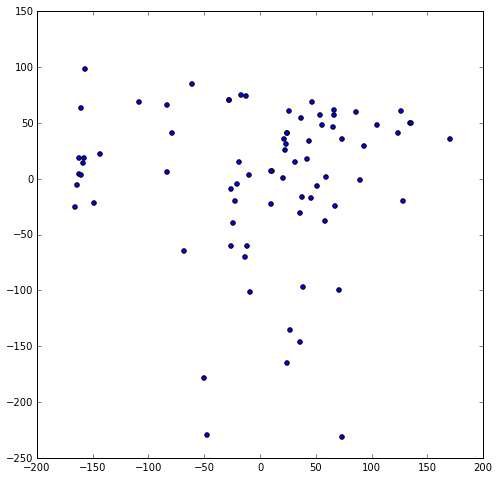

In [399]:
#red_datc = pd.DataFrame(reduced_cereal)
plt.figure(figsize = (8,8))
plt.scatter(reduced_cereal[:,0], reduced_cereal[:,1])

In [341]:
kmeans = KMeans(3)
kmeans.fit(reduced_cereal)
cereal_cluster = kmeans.predict(reduced_cereal)

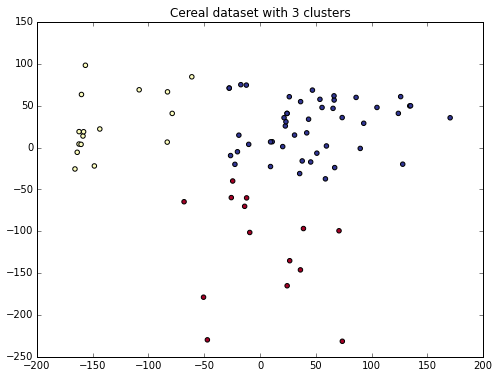

In [342]:

plt.figure(figsize=(8, 6))
plt.scatter(reduced_cereal[:,0], reduced_cereal[:,1], c=cereal_cluster, cmap="RdYlBu")
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], alpha=.5, s=250)
plt.title("Cereal dataset with 3 clusters")
plt.show()

In [343]:
cereal_cluster_list = cereal_cluster.tolist()
names_list = list(names)
zipped = zip(cereal_cluster_list, names_list)

In [344]:
zipped1 = list(zipped)

In [346]:
pd.DataFrame(sorted(zipped1), columns=["Cluster", "Name"]).head()

,Cluster,Name
0,0,100%_Bran
1,0,All-Bran
2,0,All-Bran_with_Extra_Fiber
3,0,Bran_Flakes
4,0,Cracklin'_Oat_Bran


###Below is data when the data is adjusted so each cereal is one cup
####This means that if the cereal had a value of 1 for potass at half a cup it has a value of 2 for a full cup

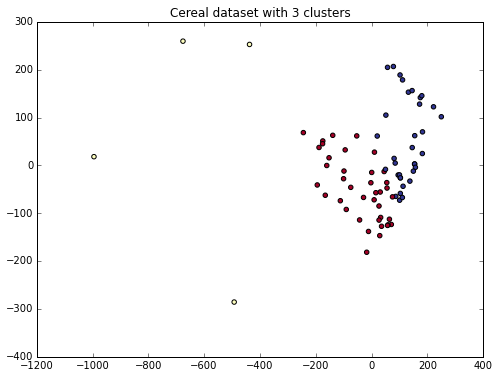

In [364]:
kmeans = KMeans(3)
kmeans.fit(reduced_cereal)
cereal_cluster = kmeans.predict(reduced_cereal)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_cereal[:,0], reduced_cereal[:,1], c=cereal_cluster, cmap="RdYlBu")
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], alpha=.5, s=250)
plt.title("Cereal dataset with 3 clusters")
plt.show()

In [387]:
cereal_cluster_list = cereal_cluster.tolist()
names_list = list(names)
zipped = zip(cereal_cluster_list, names_list)

In [388]:
zipped1 = list(zipped)

In [389]:
sortedcereal = pd.DataFrame(sorted(zipped1), columns=["Cluster", "Name"])

In [442]:
cereal["Name"] = names
cereal
newcereal = pd.DataFrame.merge(cereal, sortedcereal)
#newcereal.sort(Cluster)
newcereal.sort(['Cluster'], ascending=[True])
newcereal[29:]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,Name,Cluster
29,146.666667,1.333333,1.333333,180.000000,0.000000,17.333333,16.000000,33.333333,33.333333,2.666667,1.333333,1,Fruity_Pebbles,2
30,113.636364,2.272727,0.000000,51.136364,0.000000,12.500000,17.045455,45.454545,28.409091,1.136364,1.136364,1,Golden_Crisp,2
31,146.666667,1.333333,1.333333,373.333333,0.000000,20.000000,12.000000,60.000000,33.333333,2.666667,1.333333,1,Golden_Grahams,0
32,113.636364,3.409091,1.136364,159.090909,3.409091,17.045455,5.681818,96.590909,28.409091,3.409091,1.136364,1,Grape_Nuts_Flakes,2
33,440.000000,12.000000,0.000000,680.000000,12.000000,68.000000,12.000000,360.000000,100.000000,12.000000,4.000000,1,Grape-Nuts,1
34,363.636364,9.090909,9.090909,227.272727,9.090909,39.393939,12.121212,303.030303,75.757576,9.090909,3.030303,1,Great_Grains_Pecan,0
35,120.000000,1.000000,2.000000,220.000000,1.000000,12.000000,11.000000,45.000000,25.000000,2.000000,1.000000,1,Honey_Graham_Ohs,2
36,146.666667,4.000000,1.333333,333.333333,2.000000,15.333333,13.333333,120.000000,33.333333,1.333333,1.333333,1,Honey_Nut_Cheerios,0
37,82.706767,0.751880,0.000000,135.338346,0.000000,10.526316,8.270677,26.315789,18.796992,0.751880,0.751880,1,Honey-comb,2
38,110.000000,2.000000,1.000000,170.000000,1.000000,17.000000,6.000000,60.000000,100.000000,3.000000,1.000000,1,Just_Right_Crunchy__Nuggets,2


####Well, this doesn't mean much to me
####That means it's time to analyze!

In [425]:
cluster0 = newcereal[newcereal.Cluster == 0]
cluster1 = newcereal[newcereal.Cluster == 1]
cluster2 = newcereal[newcereal.Cluster == 2]

In [431]:
cluster0_mean = cluster0.mean()
cluster1_mean = cluster1.mean()
cluster2_mean = cluster2.mean()

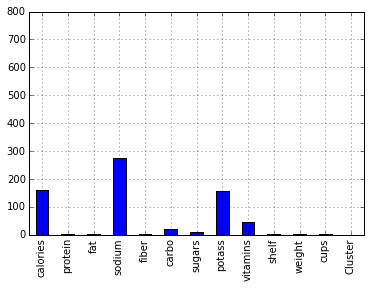

In [439]:
plt.figure()
plt.ylim(ymin=0, ymax=800)
cluster0_mean.plot(kind="bar")

####Midrange in regard to nutrients
####Generally Cereals with Bran in the name

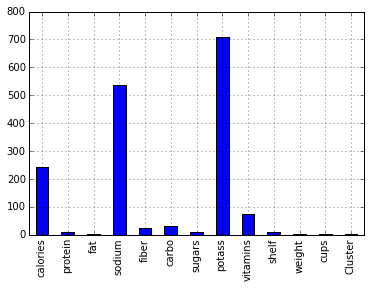

In [440]:
plt.figure()
plt.ylim(ymin=0, ymax=800)
cluster1_mean.plot(kind="bar")

####Cluster 1 has higher concentrations of everyting
####Aka health Cereals

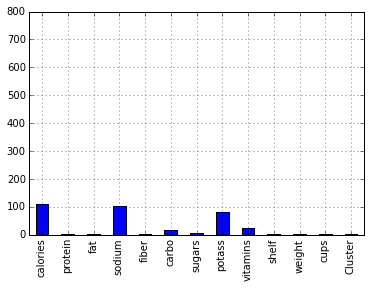

In [441]:
plt.figure()
plt.ylim(ymin=0, ymax=800)
cluster2_mean.plot(kind="bar")

####Contains less of everything except sugars
####Mostley Kids Cereals 